# About The Company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

# Business Task
Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Design marketing strategies aimed at converting casual riders into annual members.

# Questions That Guide This Study
* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

## Load Packages

In [45]:
library("tidyverse")
library("stringr")
library("lubridate")
library("ggbeeswarm")

## Read The Data

In [46]:
data01_23 <- read_csv("/kaggle/input/cyclistic-bike-share-apr-22-mar-23/Cyclistic_Dataset_0423_0323/New folder/Chic_bike_Jan_23.csv")

Rows: 190301 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Adding Columns

In [48]:
# data01_23
# It is of interest to be able to determine the duration of the ride as well as 
# the day on which it was generated.
data01_23 <- data01_23 %>%
    mutate(ride_length = difftime(ended_at, started_at, units = "hours"))
data01_23 <- data01_23 %>%
    mutate(day_of_week = wday(data01_23$started_at))

In [49]:
# data01_23
# A value of ride length can´t be 0, so the rows with this value will be removed.
data01_23 <- data01_23 %>%
  filter(ride_length > 0)

## Analyse

In [62]:
# data01_23
# Grouped by type of suscription
data01_23 %>%
  group_by(member_casual) %>%
  summarise(mean_ride_length = mean(ride_length),
            max_ride_length  = max(ride_length),
            min_ride_length  = min(ride_length)) %>%
  arrange(-mean_ride_length)

# Grouped by day of week
data01_23 %>%
  group_by(day_of_week) %>%
  summarise(mean_ride_length = mean(ride_length),
            max_ride_length  = max(ride_length),
            min_ride_length  = min(ride_length)) %>%
  arrange(-mean_ride_length) 

# Grouped by type of suscription and day of the week
data01_23 %>%
  group_by(member_casual, day_of_week) %>%
  summarise(mean_ride_length = mean(ride_length),
            max_ride_length  = max(ride_length),
            min_ride_length  = min(ride_length)) %>%
  arrange(-mean_ride_length)

# Type of bycicle grouped by type of suscription
data01_23 %>%
  filter(member_casual %in% c("member", "casual")) %>%
  group_by(member_casual) %>%
  count(rideable_type) %>%
  arrange(-n)

# Most popular destination for causal suscriptors
data01_23 %>% 
  na.omit() %>%  
  filter(member_casual == "casual") %>%
  group_by(member_casual) %>%
  count(start_station_name, end_station_name, day_of_week, sort = TRUE) %>%
  filter(n > 15)

# Most popular destination for causal suscriptors
data01_23 %>%  
  na.omit() %>%
  filter(member_casual == "member") %>%
  group_by(member_casual) %>%
  count(start_station_name, end_station_name, day_of_week, sort = TRUE) %>%
  filter(n > 90)



member_casual,mean_ride_length,max_ride_length,min_ride_length
<chr>,<drtn>,<drtn>,<drtn>
casual,0.3819426 hours,560.06222 hours,0.0002777778 hours
member,0.1727018 hours,24.99889 hours,0.0002777778 hours


day_of_week,mean_ride_length,max_ride_length,min_ride_length
<dbl>,<drtn>,<drtn>,<drtn>
1,0.2961313 hours,560.0622 hours,0.0002777778 hours
7,0.2423442 hours,257.0308 hours,0.0002777778 hours
2,0.2113481 hours,188.8822 hours,0.0002777778 hours
6,0.2074098 hours,313.9475 hours,0.0002777778 hours
5,0.2002005 hours,257.4317 hours,0.0002777778 hours
4,0.1972451 hours,209.0789 hours,0.0002777778 hours
3,0.1933586 hours,260.1028 hours,0.0002777778 hours


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,mean_ride_length,max_ride_length,min_ride_length
<chr>,<dbl>,<drtn>,<drtn>,<drtn>
casual,1,0.5546697 hours,560.06222 hours,0.0005555556 hours
casual,7,0.4276979 hours,257.03083 hours,0.0008333333 hours
casual,2,0.3680982 hours,188.88222 hours,0.0002777778 hours
casual,5,0.3638854 hours,257.43167 hours,0.0005555556 hours
casual,6,0.3370867 hours,313.94750 hours,0.0002777778 hours
casual,4,0.3162967 hours,209.07889 hours,0.0005555556 hours
casual,3,0.3031274 hours,260.10278 hours,0.0005555556 hours
member,1,0.1930328 hours,24.99861 hours,0.0002777778 hours
member,7,0.1794268 hours,24.99861 hours,0.0002777778 hours


member_casual,rideable_type,n
<chr>,<chr>,<int>
member,classic_bike,76385
member,electric_bike,73903
casual,electric_bike,24358
casual,classic_bike,13909
casual,docked_bike,1738


member_casual,start_station_name,end_station_name,day_of_week,n
<chr>,<chr>,<chr>,<dbl>,<int>
casual,Ellis Ave & 60th St,University Ave & 57th St,3,26
casual,Ellis Ave & 60th St,Ellis Ave & 55th St,3,21
casual,Ellis Ave & 55th St,Ellis Ave & 60th St,3,19
casual,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,1,19
casual,Ellis Ave & 60th St,University Ave & 57th St,7,18
casual,Ellis Ave & 60th St,Ellis Ave & 55th St,5,17
casual,Ellis Ave & 60th St,Ellis Ave & 55th St,7,17
casual,Ellis Ave & 60th St,University Ave & 57th St,2,17
casual,Ellis Ave & 60th St,University Ave & 57th St,5,17


member_casual,start_station_name,end_station_name,day_of_week,n
<chr>,<chr>,<chr>,<dbl>,<int>
member,Ellis Ave & 60th St,University Ave & 57th St,3,123
member,University Ave & 57th St,Ellis Ave & 60th St,3,123
member,Ellis Ave & 55th St,Ellis Ave & 60th St,3,108
member,Ellis Ave & 60th St,Ellis Ave & 55th St,3,99
member,Ellis Ave & 60th St,University Ave & 57th St,4,99
member,University Ave & 57th St,Ellis Ave & 60th St,5,97
member,Ellis Ave & 60th St,Ellis Ave & 55th St,5,93
member,Ellis Ave & 60th St,University Ave & 57th St,7,92


* The average travel time for casual subscribers is .24 h (14 minutes) while that of member subscribers is .16 h (10 minutes).
* The days with the longest average trip duration between both subscribers are Monday (1), Sunday (7) and Thursday (4).
* The days with the longest average trip duration for both types of subscribers are Monday (1) and Sunday (7).
* Member subscribers do not use docked bicycles and their preference is the classic one and casual subscribers use the electric one.
* The most common route for subscribers is to start at the Ellis Ave & 60th St station and end at University Ave & 57th St. on Wednesday (3).

## Visualization

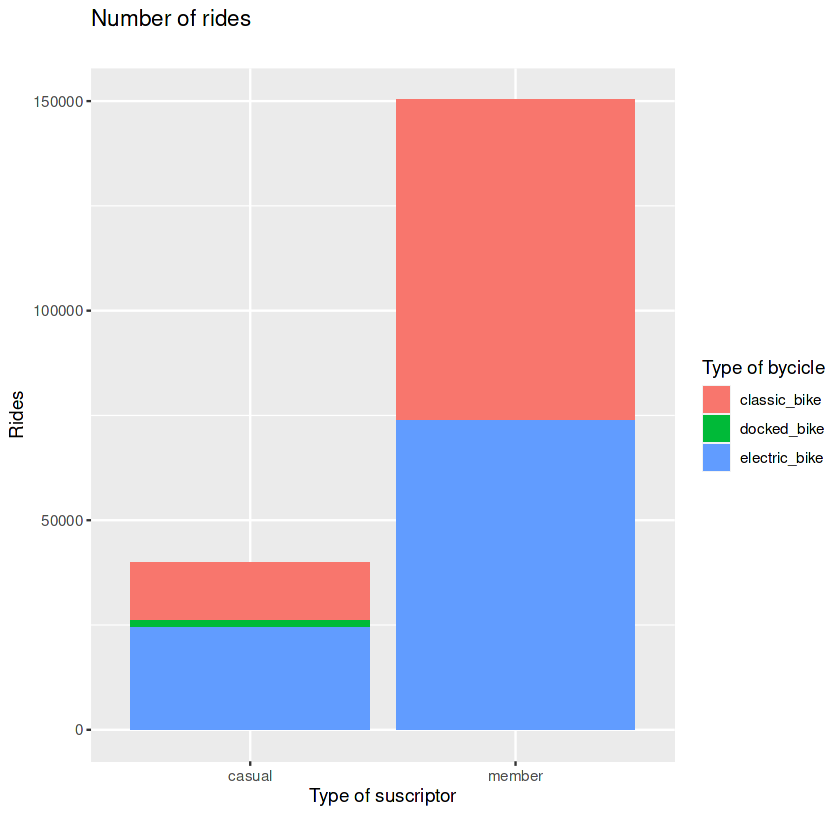

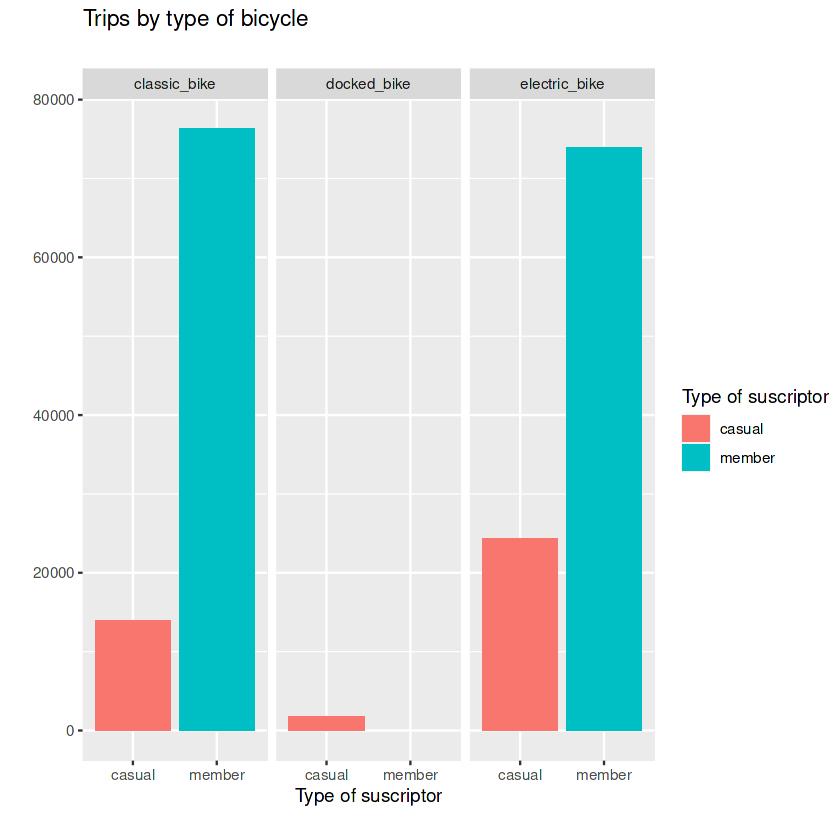

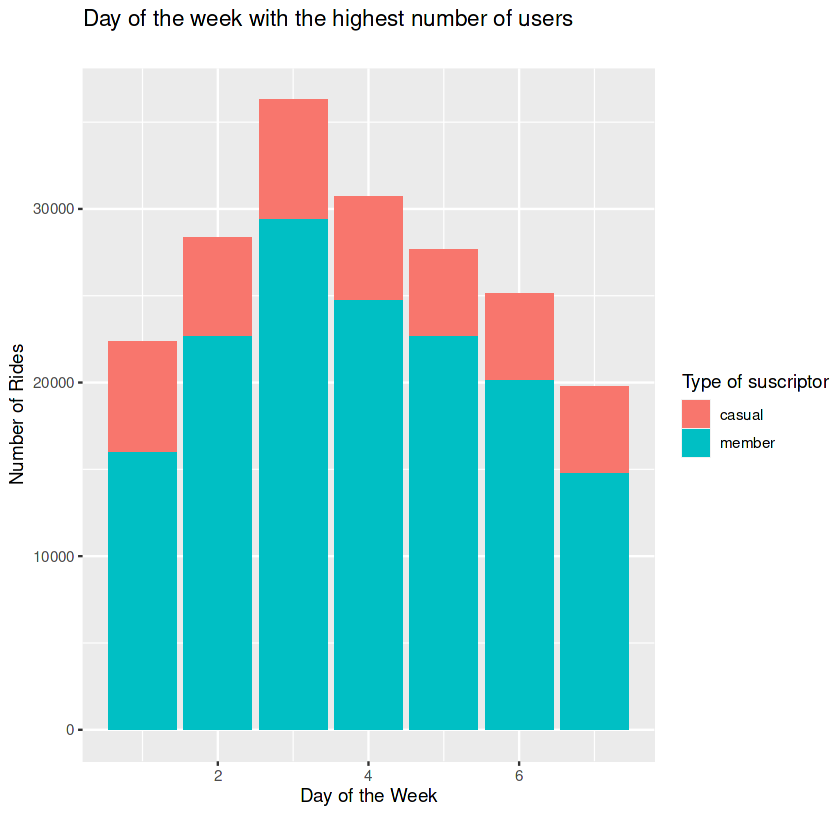

In [59]:
# Number of rides of each type of suscriptor
data01_23 %>%
  ggplot(aes(member_casual, fill = rideable_type)) + 
  geom_bar() + 
  labs(title = "Number of rides",
                 subtitle = "", 
                 caption = "", 
                 x = "Type of suscriptor", y = "Rides", fill = "Type of bycicle")

data01_23 %>%
  ggplot(aes(member_casual, fill = member_casual)) + 
  geom_bar() + 
  facet_wrap(~ rideable_type) + 
  labs(title = "Trips by type of bicycle",
       subtitle = "", 
       caption = "", 
       x = "Type of suscriptor", y = "", fill = "Type of suscriptor")

data01_23 %>%
  ggplot(aes(day_of_week)) + 
  geom_bar(aes(fill = member_casual)) +
  labs(title = "Day of the week with the highest number of users",
       subtitle = "", 
       caption = "", 
       x = "Day of the Week", y = "Number of Rides", fill = "Type of suscriptor")


## Conclusion

Subscribers have use of the similar cyclist service on peak usage days and the initial and final station route. The difference between them is that member subscribers prefer the classic type of bicycle while casual subscribers prefer the electric one.